In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re 
%matplotlib inline

import sys, os
sys.path.append(os.path.dirname(os.path.abspath('')))
sys.path.append(os.path.join(os.path.abspath(''),'..','scripts'))
sys.path.append(os.path.join(os.path.abspath(''),'..','src'))

from Experiment import *
from Analyzer import *
from Artist import *
artist = Artist()

# SatGreedy

In [2]:
# non-journal version lost
results = Analyzer("grp_satgreedy").df

AssertionError: 

Text(0.5, 0, 'k')

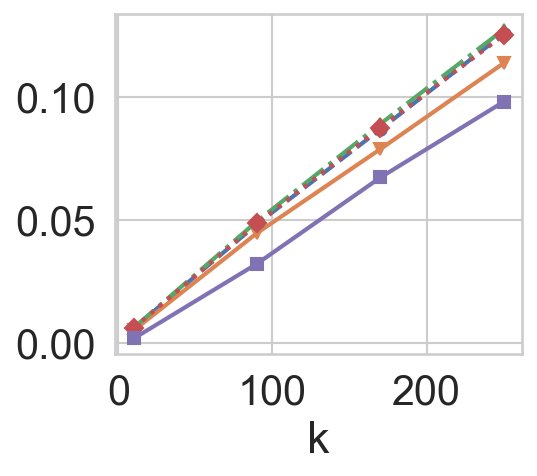

In [10]:
# update default number_of_blocked_nodes
default_number_of_blocked_nodes = 180
default_n = 3000
default_number_of_seeds = 90

fig = plt.figure(figsize=(3.5, 3), dpi=150)
sns.set(style="whitegrid", font_scale=1.8, rc={'axes.grid': True})
ax = fig.add_subplot(1, 1, 1)
markers_and_lines = [('--','o'),('-','v'),('-.','^'),(':','D'),('-','s'),('--','h'),('--','h'),('--','h'),('--','h')]
names = {"satgreedy": "SatGreedy", "all_greedy": "AllGreedy", "single_greedy": "SingleGreedy", "single_greedy_celf": "SingleGreedy CELF"}
i = 0
results1 = results[results['number_of_blocked_nodes'] == default_number_of_blocked_nodes]
results1 = results1[results1['n'] == default_n]
for s in names:
    d = pd.DataFrame(results1[results1["solver"] == s])
    d = d.sort_values("seeds")
    if len(d) == 0:
        continue
    d['seeds'] = d['cmd'].apply(lambda x: int(re.match(r".* -s ([0-9]+) .*", x).group(1)))
    d = d.sort_values("seeds")
    ax.plot(d['seeds'],(d['objective']),label=names[s],linestyle=markers_and_lines[i][0], marker=markers_and_lines[i][1], linewidth=2.0)
    i += 1
    
d = results1[~results1['solver'].isin(names)]
d = d.groupby('number_of_seeds', as_index=False)['objective'].min()
ax.plot(d['number_of_seeds'],np.array(d['objective'])/results1.iloc[0]['n'],label="IMM",linestyle=markers_and_lines[i][0],
        marker=markers_and_lines[i][1], linewidth=2.0)
    
# ax.set_yscale("log")
ax.set_xlabel("k")
# ax.set_ylabel(r'$\nu$')
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# ax.legend(bbox_to_anchor=(1., 1.02, 0., .102), loc=3,
#            ncol=2, mode="expand", borderaxespad=0.)

## true one below
# ax.legend(bbox_to_anchor=(-.35, -0.4, 3, .102), loc='upper left',
#            ncol=5, mode="expand", borderaxespad=0.,frameon=True)

Text(0.5, 0, '$\\ell$')

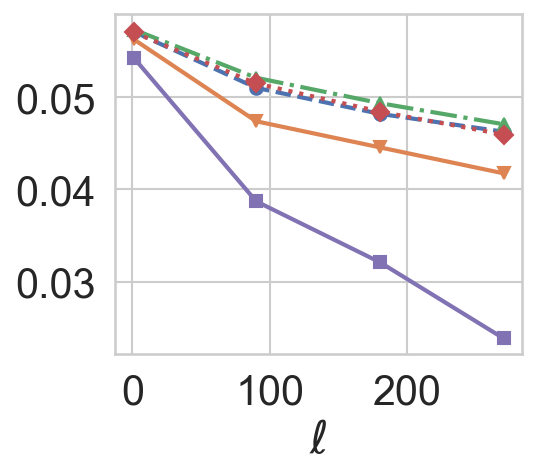

In [11]:
# update default number_of_blocked_nodes
fig = plt.figure(figsize=(3.5, 3), dpi=150)
sns.set(style="whitegrid", font_scale=1.8, rc={'axes.grid': True})
ax = fig.add_subplot(1, 1, 1)
markers_and_lines = [('--','o'),('-','v'),('-.','^'),(':','D'),('-','s'),('--','h'),('--','h'),('--','h'),('--','h')]
names = {"satgreedy": "SatGreedy", "all_greedy": "AllGreedy", "single_greedy": "SingleGreedy", "single_greedy_celf": "SingleGreedy CELF"}
i = 0
results1 = results[results['n'] == default_n]
for s in names:
    d = pd.DataFrame(results1[results1["solver"] == s])
    d = d.sort_values("seeds")
    if len(d) == 0:
        continue
    d['seeds'] = d['cmd'].apply(lambda x: int(re.match(r".* -s ([0-9]+) .*", x).group(1)))
    d = d[d['seeds'] == default_number_of_seeds]
    d = d.sort_values("number_of_blocked_nodes")
    ax.plot(d['number_of_blocked_nodes'],(d['objective']),label=names[s],linestyle=markers_and_lines[i][0], marker=markers_and_lines[i][1], linewidth=2.0)
    i += 1
    
d = results1[~results1['solver'].isin(names)]
d = d[d['number_of_seeds'] == default_number_of_seeds]
d = d.groupby('number_of_blocked_nodes', as_index=False)['objective'].min()
ax.plot(d['number_of_blocked_nodes'],np.array(d['objective'])/results1.iloc[0]['n'],label="IMM",linestyle=markers_and_lines[i][0],
        marker=markers_and_lines[i][1], linewidth=2.0)
    
# ax.set_yscale("log")
ax.set_xlabel(r'$\ell$')
# ax.set_ylabel(r'$\nu$')
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# ax.legend(bbox_to_anchor=(1., 1.02, 0., .102), loc=3,
#            ncol=2, mode="expand", borderaxespad=0.)

## true one below
# ax.legend(bbox_to_anchor=(-.35, -0.4, 3, .102), loc='upper left',
#            ncol=5, mode="expand", borderaxespad=0.,frameon=True)

Text(0, 0.5, '$\\nu$')

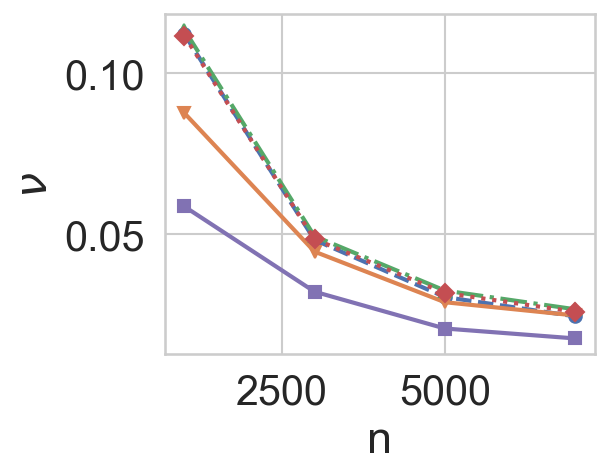

In [12]:
# update default number_of_blocked_nodes
fig = plt.figure(figsize=(3.7, 3), dpi=150)
sns.set(style="whitegrid", font_scale=1.8, rc={'axes.grid': True})
ax = fig.add_subplot(1, 1, 1)
markers_and_lines = [('--','o'),('-','v'),('-.','^'),(':','D'),('-','s'),('--','h'),('--','h'),('--','h'),('--','h')]
names = {"satgreedy": "SatGreedy", "all_greedy": "AllGreedy", "single_greedy": "SingleGreedy", "single_greedy_celf": "SingleGreedy CELF"}
i = 0
results1 = results[results['number_of_blocked_nodes'] == default_number_of_blocked_nodes]
for s in names:
    d = pd.DataFrame(results1[results1["solver"] == s])
    d = d.sort_values("seeds")
    if len(d) == 0:
        continue
    d['seeds'] = d['cmd'].apply(lambda x: int(re.match(r".* -s ([0-9]+) .*", x).group(1)))
    d = d[d['seeds'] == default_number_of_seeds]
    d = d.sort_values("n")
    ax.plot(d['n'],(d['objective']),label=names[s],linestyle=markers_and_lines[i][0], marker=markers_and_lines[i][1], linewidth=2.0)
    i += 1
    
d = results1[~results1['solver'].isin(names)]
d = d[d['number_of_seeds'] == default_number_of_seeds]
d = d.groupby('n', as_index=False)['objective'].min()
ax.plot(d['n'],np.array(d['objective'])/d['n'],label="IMM",linestyle=markers_and_lines[i][0],
        marker=markers_and_lines[i][1], linewidth=2.0)
    
# ax.set_yscale("log")
ax.set_xlabel("n")
ax.set_ylabel(r'$\nu$')
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# ax.legend(bbox_to_anchor=(1., 1.02, 0., .102), loc=3,
#            ncol=2, mode="expand", borderaxespad=0.)

## true one below
# ax.legend(bbox_to_anchor=(-.35, -0.4, 3, .102), loc='upper left',
#            ncol=5, mode="expand", borderaxespad=0.,frameon=True)

# Other

In [37]:
results = Analyzer("grp_seeds_params").df

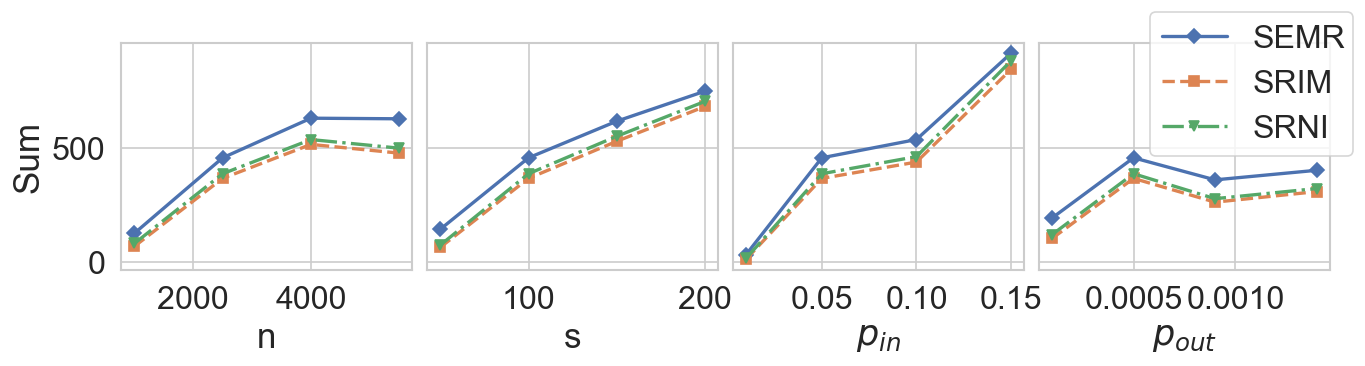

In [49]:
df = results
res = pd.DataFrame()
df['seeds'] = df['cmd'].apply(lambda x: int(re.match(r".* -s ([0-9]+) .*", x).group(1)))

all_params = ["n", "s","p_in","p_out"]
defaults = {
    "n": 2500,
    "s": 100,
    "p_in": 0.05,
    "p_out": 0.0005
}
names = {"satgreedy": "SatGreedy", "all_greedy": "AllGreedy", "single_greedy": "SingleGreedy", "single_greedy_celf": "SingleGreedy CELF"}
param_names = {"n":"n", "s": "s", "p_in": "$p_{in}$", "p_out": "$p_{out}$"}

def fix_other_params(variable, df, defaults):
    for p in defaults:
        if p == variable:
            continue
        df = df[df[p] == defaults[p]]
    return df

j = 0
sns.set(style="whitegrid", font_scale=1.75, rc={'axes.grid': True})
fig, axs = plt.subplots(1, 4, sharey=True, dpi=120, figsize=(13,2.5))
fig.subplots_adjust(wspace=0.05)
for param in all_params:
    for p in df[param].unique():
        dd = df[df[param] == p]
        dd = fix_other_params(param, dd, defaults)

        emf = dd[dd['mode'] == 5]
        emf_seq = np.amin([emf.loc[i,'sequence'] for i in emf.index],axis=0)
        res = res.append({"Active nodes": sum(emf_seq)/dd.iloc[0]['n'], param: p, "Solver": "SEMR"}, ignore_index=True)

        emf = dd[dd['mode'] == 0]
        emf_seq = np.amin([emf.loc[i,'sequence'] for i in emf.index],axis=0)
        res = res.append({"Active nodes": sum(emf_seq)/dd.iloc[0]['n'], param: p, "Solver": "SRNI"}, ignore_index=True)

        emf = dd[dd['mode'].isna()]
        for i in emf.index:
            res = res.append({"Active nodes": sum(emf.loc[i,'sequence'])/dd.iloc[0]['n'], param: p, "Solver": "SRIM"}, ignore_index=True)
            

    res = pd.DataFrame(res)
    res = res.sort_values(param)
    i = 0
    for s in res.groupby('Solver'):
        axs[j].plot(s[1][param],s[1]['Active nodes'],label=s[0],linestyle=artist.LINE_STYLES[i],marker=artist.markers[i],linewidth=2.0)
        i += 1
    axs[j].set_xlabel(param_names[param])
    j+=1
axs[0].set_ylabel("Sum")
axs[3].legend(bbox_to_anchor=(0.38, 0.5, 0.7, 0), loc=0, ncol=1, mode="expand", borderaxespad=0.)
# axs[3].legend()
plt.show()

# Scalability Part

In [35]:
result = Analyzer('grp_alpha_dense').df
result2 = Analyzer('grp_alpha_dense_bigger').df
result = pd.concat([result, result2],sort=True)

(190.0, 10000)

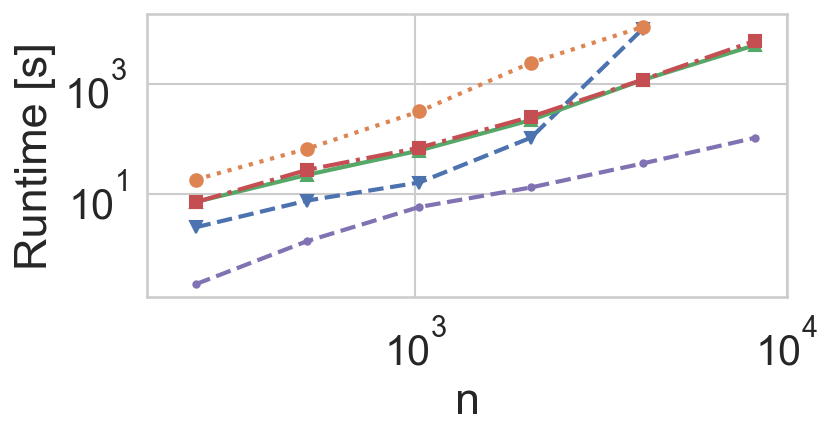

In [36]:
fig = plt.figure(figsize=(5.5, 2.5), dpi=150)
sns.set(style="whitegrid", font_scale=1.8, rc={'axes.grid': True})
ax = fig.add_subplot(1, 1, 1)
df = result.copy()
plt.xscale("log")
plt.yscale("log")
df['runtime'] = df['runtime']/(10**9)
df['time'] = df['time']/(10**9)
df['dim_time'] = df['dim_time']/(10**9)
df['time'] += df['dim_time']
df[df['mode']==5].groupby("n").sum()["runtime"].plot(marker="v", linestyle="--", label="SEMR (S-Dagger)", ax=ax, linewidth=2.0)
df[df['mode']==6].groupby("n").sum()["runtime"].plot(marker="o", linestyle=":", label="SEMR (BIT-Dagger)", ax=ax, linewidth=2.0)
df[df['mode']==0].groupby("n").sum()["runtime"].plot(marker="^", linestyle="-", label="SRNI", ax=ax, linewidth=2.0)
df[df['mode'].isna()].groupby("n").sum()["time"].plot(marker="s", linestyle="-.", label="SRIM", ax=ax, linewidth=2.0)


df[df['mode']==0].groupby("n").sum()["Total imm time"].plot(marker=".", linestyle="--", label="Immunization", ax=ax, linewidth=2.0)

plt.ylabel("Runtime [s]")
plt.xlim((1.9*10**2,10**4))
# plt.legend(bbox_to_anchor=(0., -0.6, 3.1, .102), loc=3, ncol=5, mode="expand", borderaxespad=0.)

In [30]:
result = Analyzer('grp_alpha').df
result2 = Analyzer('grp_alpha_bigger').df
result = pd.concat([result, result2])

Text(0, 0.5, 'Runtime [s]')

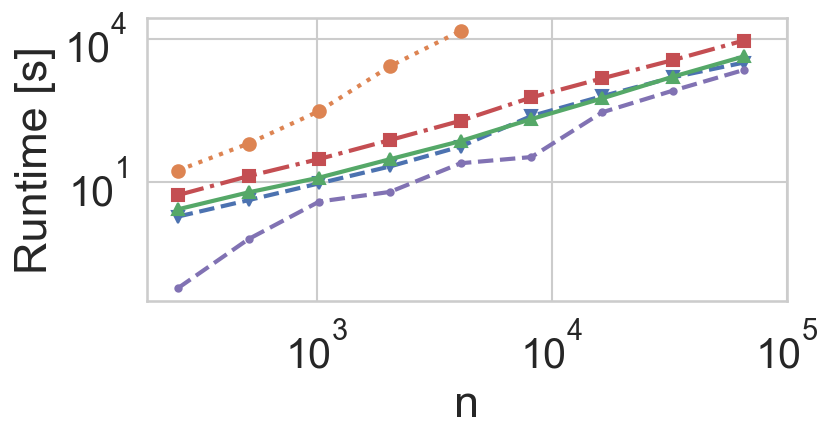

In [34]:
fig = plt.figure(figsize=(5.5, 2.5), dpi=150)
ax = fig.add_subplot(1, 1, 1)
df = result.copy()
plt.xscale("log")
plt.yscale("log")
df = result.copy()
df['runtime'] = df['runtime']/(10**9)
df['time'] = df['time']/(10**9)
df['dim_time'] = df['dim_time']/(10**9)
df['time'] += df['dim_time']
df[df['mode']==5].groupby("n").sum()["runtime"].plot(marker="v", linestyle="--", label="SEMF (S-Dagger)", ax=ax, linewidth=2.0)
df[df['mode']==6].groupby("n").sum()["runtime"].plot(marker="o", linestyle=":", label="SEMF (BIT-Dagger)", ax=ax, linewidth=2.0)
df[df['mode']==0].groupby("n").sum()["runtime"].plot(marker="^", linestyle="-", label="SRNI", ax=ax, linewidth=2.0)
df[df['mode'].isna()].groupby("n").sum()["time"].plot(marker="s", linestyle="-.", label="SRIM", ax=ax, linewidth=2.0)

df[df['mode']==0].groupby("n").sum()["Total imm time"].plot(marker=".", linestyle="--", label="Immunization", ax=ax, linewidth=2.0)

plt.xlim((1.9*10**2,10**5))
plt.ylabel("Runtime [s]")